Análise de séries temporais

In [175]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [176]:
df = pd.read_csv('../dataset/case_28_series_train.csv')

In [177]:
# df = df[:10000]

In [178]:
df.head()

,Time,EEG,BIS
0,00:00:00.000,NaN,NaN
1,00:00:00.100,NaN,NaN
2,00:00:00.200,NaN,NaN
3,00:00:00.300,NaN,NaN
4,00:00:00.400,NaN,NaN


In [179]:
df.dtypes

Time     object
EEG     float64
BIS     float64
dtype: object

In [180]:
df.Time.dropna()

0        00:00:00.000
1        00:00:00.100
2        00:00:00.200
3        00:00:00.300
4        00:00:00.400
             ...     
44607    01:14:20.700
44608    01:14:20.800
44609    01:14:20.900
44610    01:14:21.000
44611    01:14:21.100
Name: Time, Length: 44612, dtype: object

In [181]:
df['Time'] = pd.to_datetime(df['Time'])

In [182]:
df.dtypes

Time    datetime64[ns]
EEG            float64
BIS            float64
dtype: object

Importar seasonal_decompose para decompor nossa série temporal em tendência, sazonalidade e ruído

In [183]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [184]:
df.index = df.Time

In [185]:
y = df['EEG'].dropna() 
y.head()

Time
2022-04-16 00:02:56.600     4.99084
2022-04-16 00:02:56.700    -7.00549
2022-04-16 00:02:56.800   -15.00305
2022-04-16 00:02:56.900     0.01526
2022-04-16 00:02:57.000    12.01160
Name: EEG, dtype: float64

In [186]:
resultados = seasonal_decompose(df.EEG.dropna(), freq = 1000)

In [187]:
def plotar(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1, color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    plt.legend(fontsize=18)

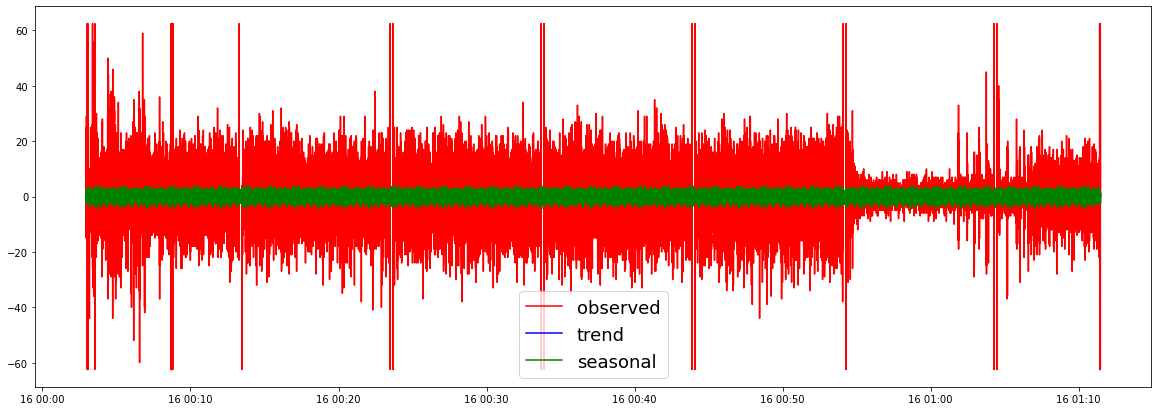

In [188]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red', 'blue', 'green', 'observed', 'trend', 'seasonal')

In [189]:
def plotar_serie(y, cor, label):
    plt.figure(figsize=(20,7))
    plt.plot(y, color=cor, label=label)
    plt.legend(fontsize=18)

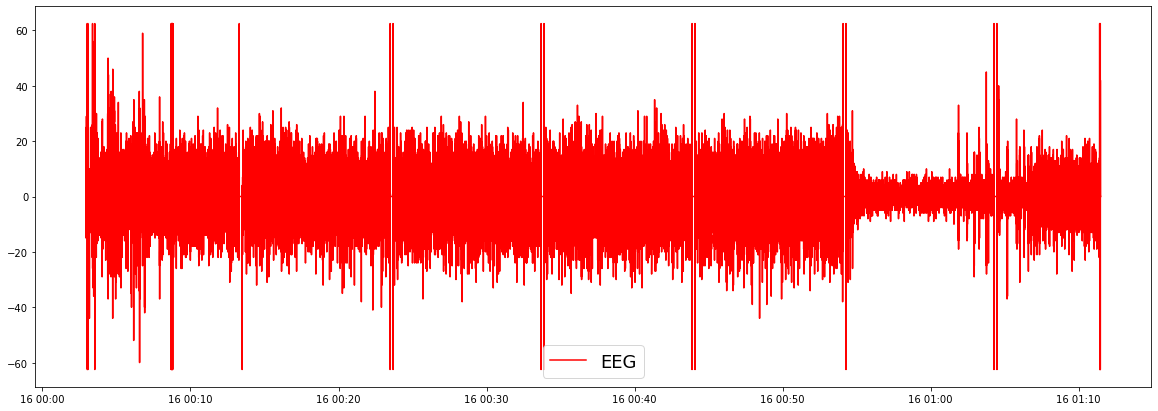

In [190]:
plotar_serie(resultados.observed, 'red', 'EEG')

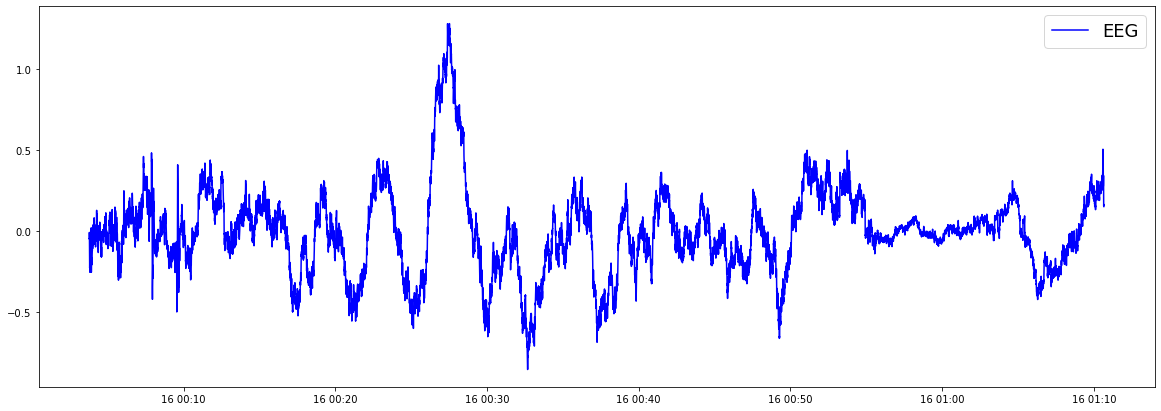

In [191]:
plotar_serie(resultados.trend, 'blue', 'EEG')

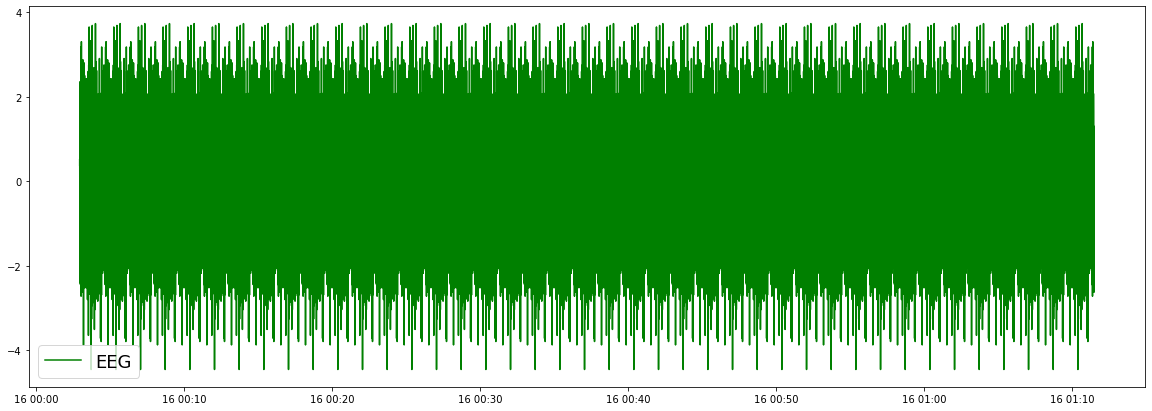

In [192]:
plotar_serie(resultados.seasonal, 'green', 'EEG')

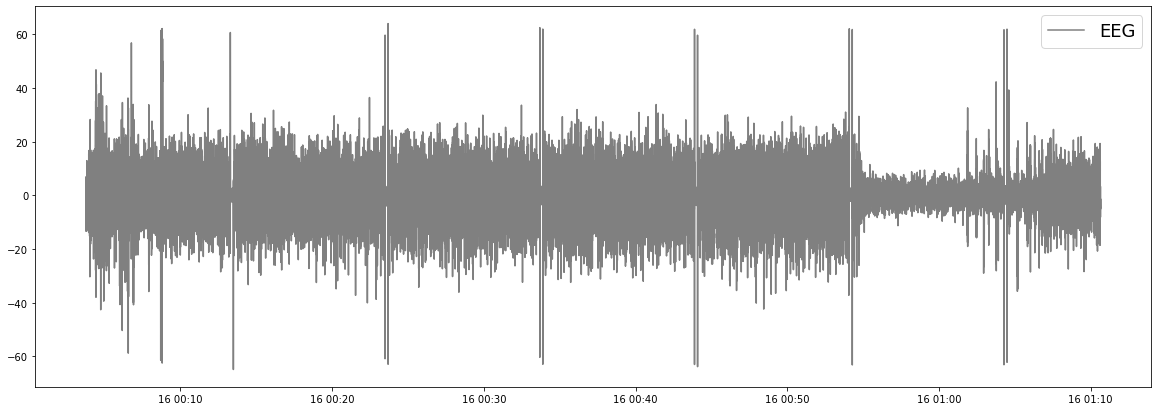

In [193]:
plotar_serie(resultados.resid, 'gray', 'EEG')

In [194]:
from statsmodels.tsa.stattools import adfuller

In [195]:
adfuller(y.dropna())

(-35.635484715085724,
 0.0,
 43,
 41085,
 {'1%': -3.4305091750910224,
  '5%': -2.8616103517847966,
  '10%': -2.5668074459868677},
 291574.1588603826)

In [196]:
resultados = seasonal_decompose(df.EEG.dropna(), freq = 1000)

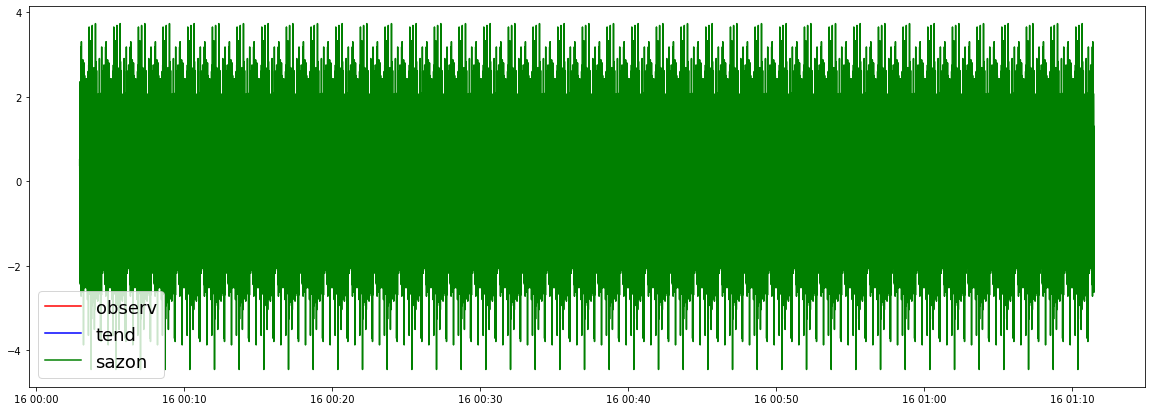

In [197]:
plotar(resultados.trend, resultados.trend, resultados.seasonal, 'red', 'blue', 'green', 'observ', 'tend', 'sazon')

In [198]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [199]:
def plotar_acf(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1,ax=ax1, title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2,ax=ax2, title='1a diff')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3,ax=ax3, title='2a diff')

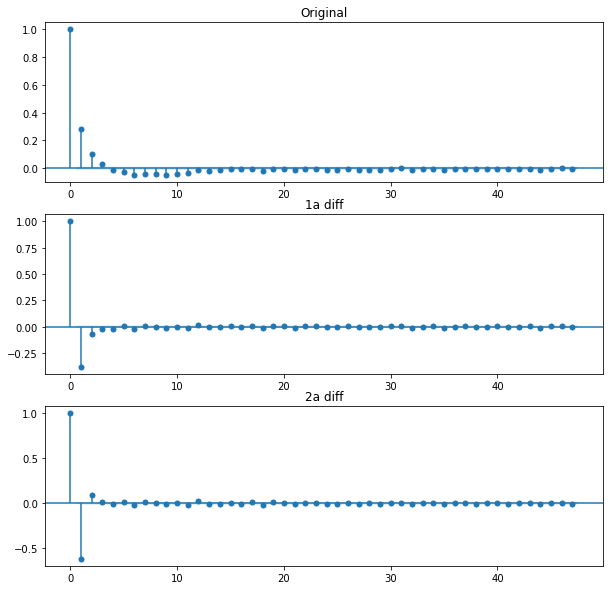

In [200]:
plotar_acf(y, y.diff().dropna(), y.diff().diff().dropna())

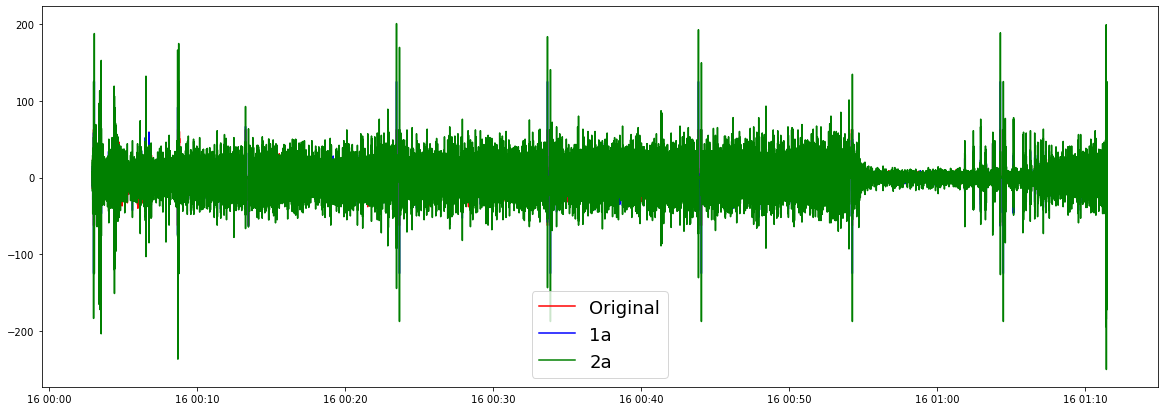

In [201]:
plotar(y, y.diff(), y.diff().diff(), 'red', 'blue', 'green', 'Original', '1a', '2a')

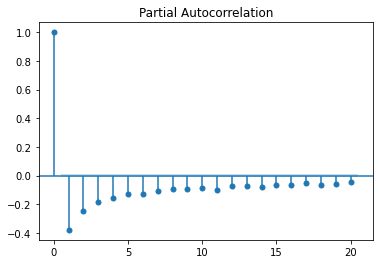

In [202]:
plot_pacf(y.diff().dropna(), lags=20);

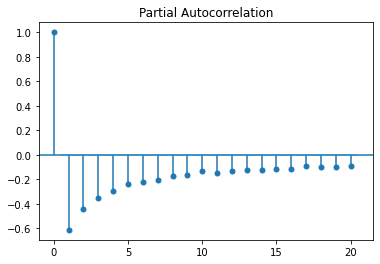

In [203]:
plot_pacf(y.diff().diff().dropna(), lags=20);

Faixa azul é o nível de significância.
Manipular muito os dados pode prejudicar o modelo no futuro

# ARIMA

Junção dos modelos (AR e MA) estatísticos com uma diferenciação.
(Dados e ruídos)

ARIMA (p, d = 1, q = 1)

Para encontrar os parâmetros do ARIMA, precisamos analisar as autocorrelações e autocorrelações parciais

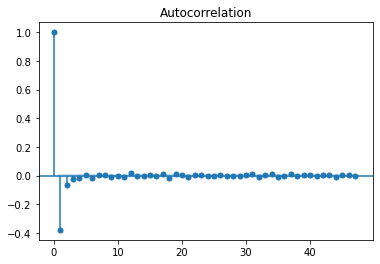

In [204]:
plot_acf(y.diff().dropna());

Mesmo com a 1a diff, vários lags estão acima do nível de significância devido a sazonalidade 

In [205]:
from statsmodels.tsa.arima_model import ARIMA

In [206]:
modelo = ARIMA(y, order=(1,1,1))

In [207]:
modelo_fit = modelo.fit(disp=0)
print(modelo_fit.summary())

BIC muito baixo pode indicar um overfitting

MA é uma regressão linear que usar valores dos ERROS das previsões passadas para prever o futuro

I (d) representa quantas representações tivemos que fazer para que a série se tonrasse estacionária

SARIMA - ARIMA sazonal (P, D, Q)

Usado quando se tem muita sazonalidade

Identificando os parâmetros de forma automática

In [ ]:
import itertools

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]

In [ ]:
print('Exemplo de combinação de parâmetros para o ARIMA sazonal')
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[2]))

Exemplo de combinação de parâmetros para o ARIMA sazonal
SARIMAX: (0, 0, 0) x (0, 0, 0, 7)
SARIMAX: (0, 0, 0) x (0, 0, 1, 7)
SARIMAX: (0, 0, 0) x (0, 1, 0, 7)


In [ ]:
import statsmodels.api as sm

aic_lista = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))


In [ ]:
aic_lista

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC62186.068405264385',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC62171.520931396786',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC68186.70218382895',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC62185.38925365454',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC62172.24077228754',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC62160.71488783725',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC65699.76667527278',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC62171.54213812738',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC61208.12597660041',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC61203.14893799045',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC67087.19041281502',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC61206.84190847087',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC61203.36381915029',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC61200.02435386517',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC64651.6608978828',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC61201.97722179232',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC64133.54544491487',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC64135.323914372835',
 'ARIMA(

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,7))
results = mod.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               EEG   No. Observations:                 8234
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -30506.091
Date:                           Sat, 16 Apr 2022   AIC                          61022.182
Time:                                   12:08:46   BIC                          61057.257
Sample:                               04-16-2022   HQIC                         61034.171
                                    - 04-16-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3653      0.005     75.370      0.000       0.356       0.375
ma.L1         -0.9985      0.001   -670.441      0.000      -1.001      -0.996
ar.S.L7       -0.0237      0.008     -2.989      0.003      -0.039      -0.008
ma.S.L7       -0.9985      0.002   -577.760      0.000      -1.002      -0.995
sigma2        96.7281      0.716    135.003      0.000      95.324      98.132
===================================================================================
Ljung-Box (L1) (Q):                   1.94   Jarque-Bera (JB):             29743.74
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

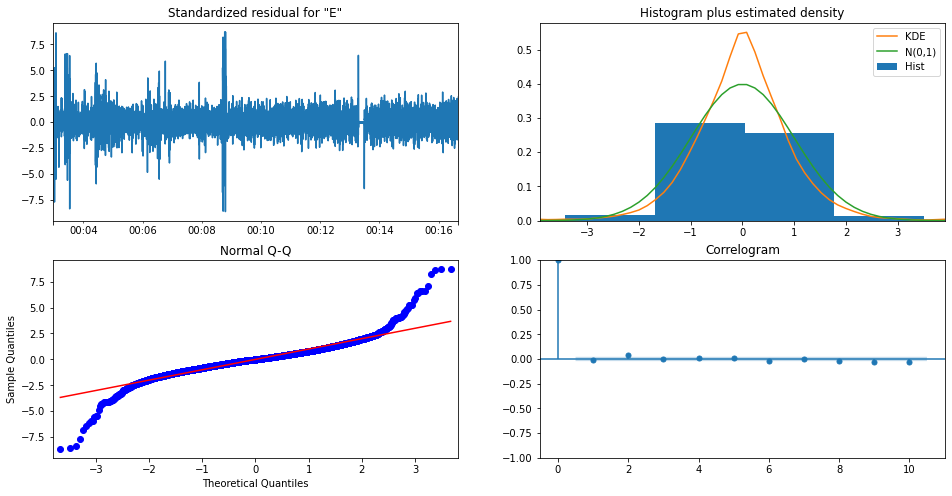

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
df.tail()

,Time,EEG,BIS
Time,,,
2022-04-16 00:16:39.500,2022-04-16 00:16:39.500,7.00549,53.0
2022-04-16 00:16:39.600,2022-04-16 00:16:39.600,19.00183,53.0
2022-04-16 00:16:39.700,2022-04-16 00:16:39.700,0.01526,53.0
2022-04-16 00:16:39.800,2022-04-16 00:16:39.800,8.01282,53.0
2022-04-16 00:16:39.900,2022-04-16 00:16:39.900,26.99939,53.0


In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2022-04-16 00:16:39.900'), dynamic=False)
pred_ic = pred.conf_int()
pred_ic

,lower EEG,upper EEG
2022-04-16 00:16:39.900,-16.124383,22.430189


predicted_mean dá a média móvel dessa previsão

iloc[:,0] pega apenas o que está na primeira coluna
iloc[:,1] pega apenas o que está na segunda coluna

In [ ]:
# y = df['Time'].values.astype('datetime64[D]')

In [ ]:
df.index

DatetimeIndex([       '2022-04-16 00:00:00', '2022-04-16 00:00:00.100000',
               '2022-04-16 00:00:00.200000', '2022-04-16 00:00:00.300000',
               '2022-04-16 00:00:00.400000', '2022-04-16 00:00:00.500000',
               '2022-04-16 00:00:00.600000', '2022-04-16 00:00:00.700000',
               '2022-04-16 00:00:00.800000', '2022-04-16 00:00:00.900000',
               ...
                      '2022-04-16 00:16:39', '2022-04-16 00:16:39.100000',
               '2022-04-16 00:16:39.200000', '2022-04-16 00:16:39.300000',
               '2022-04-16 00:16:39.400000', '2022-04-16 00:16:39.500000',
               '2022-04-16 00:16:39.600000', '2022-04-16 00:16:39.700000',
               '2022-04-16 00:16:39.800000', '2022-04-16 00:16:39.900000'],
              dtype='datetime64[ns]', name='Time', length=10000, freq=None)

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

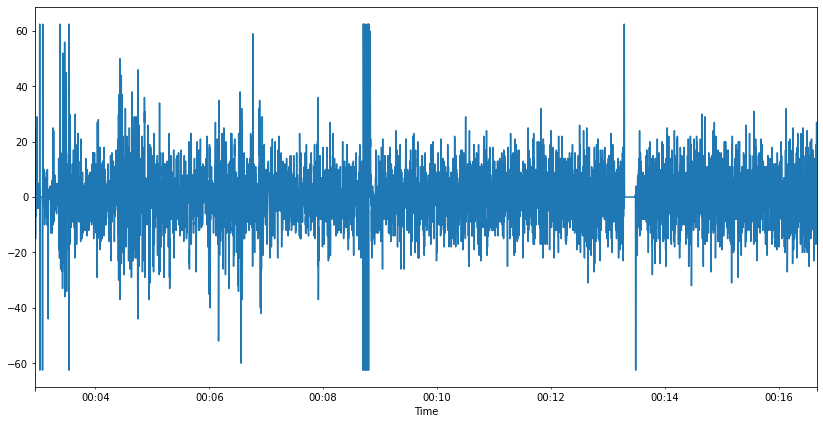

In [ ]:
ax = y['2022':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color = 'r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='b', alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('EEG')
plt.legend()
plt.show()

Steps é o número de dias que quero prever

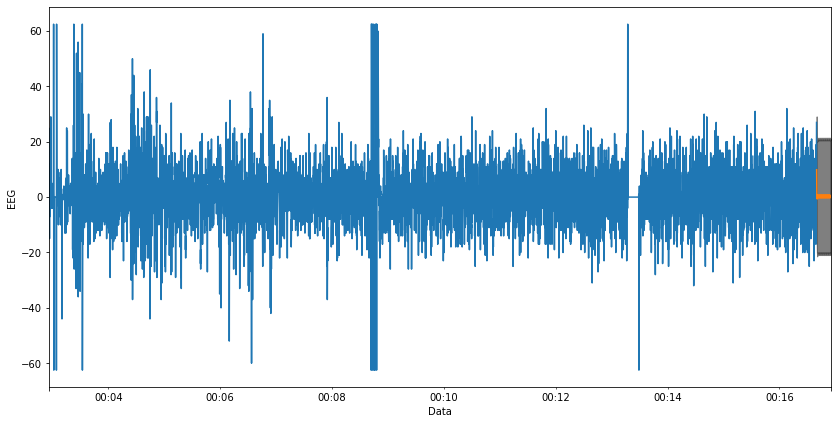

In [ ]:
pred_uc = results.get_forecast(steps=150)
pred_ic = pred_uc.conf_int()
ax = y.plot(label='observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.5)
ax.set_xlabel('Data')
ax.set_ylabel('EEG')
plt.show()

In [ ]:
# df_att = pd.read_csv('cases-brazil-states.csv')

KeyError: False

Fazer o mesmo para variável novosÓbitos